# Bikes

In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
RANDOM_SEED = 4579
np.random.seed(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## Biking with BART

In [3]:
bikes = pd.read_csv("bikes.csv")

X = bikes[["hour", "temperature", "humidity", "windspeed"]]
Y = bikes["count"]

In [4]:
with pm.Model() as model_bikes:
    α = pm.Exponential("α", 0.1)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ", np.exp(μ_))
    y = pm.NegativeBinomial("y", mu=μ, alpha=α, observed=Y)

    idata_bikes = pm.sample(
        chains=4, random_seed=RANDOM_SEED, compute_convergence_checks=False
    )

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 91 seconds.


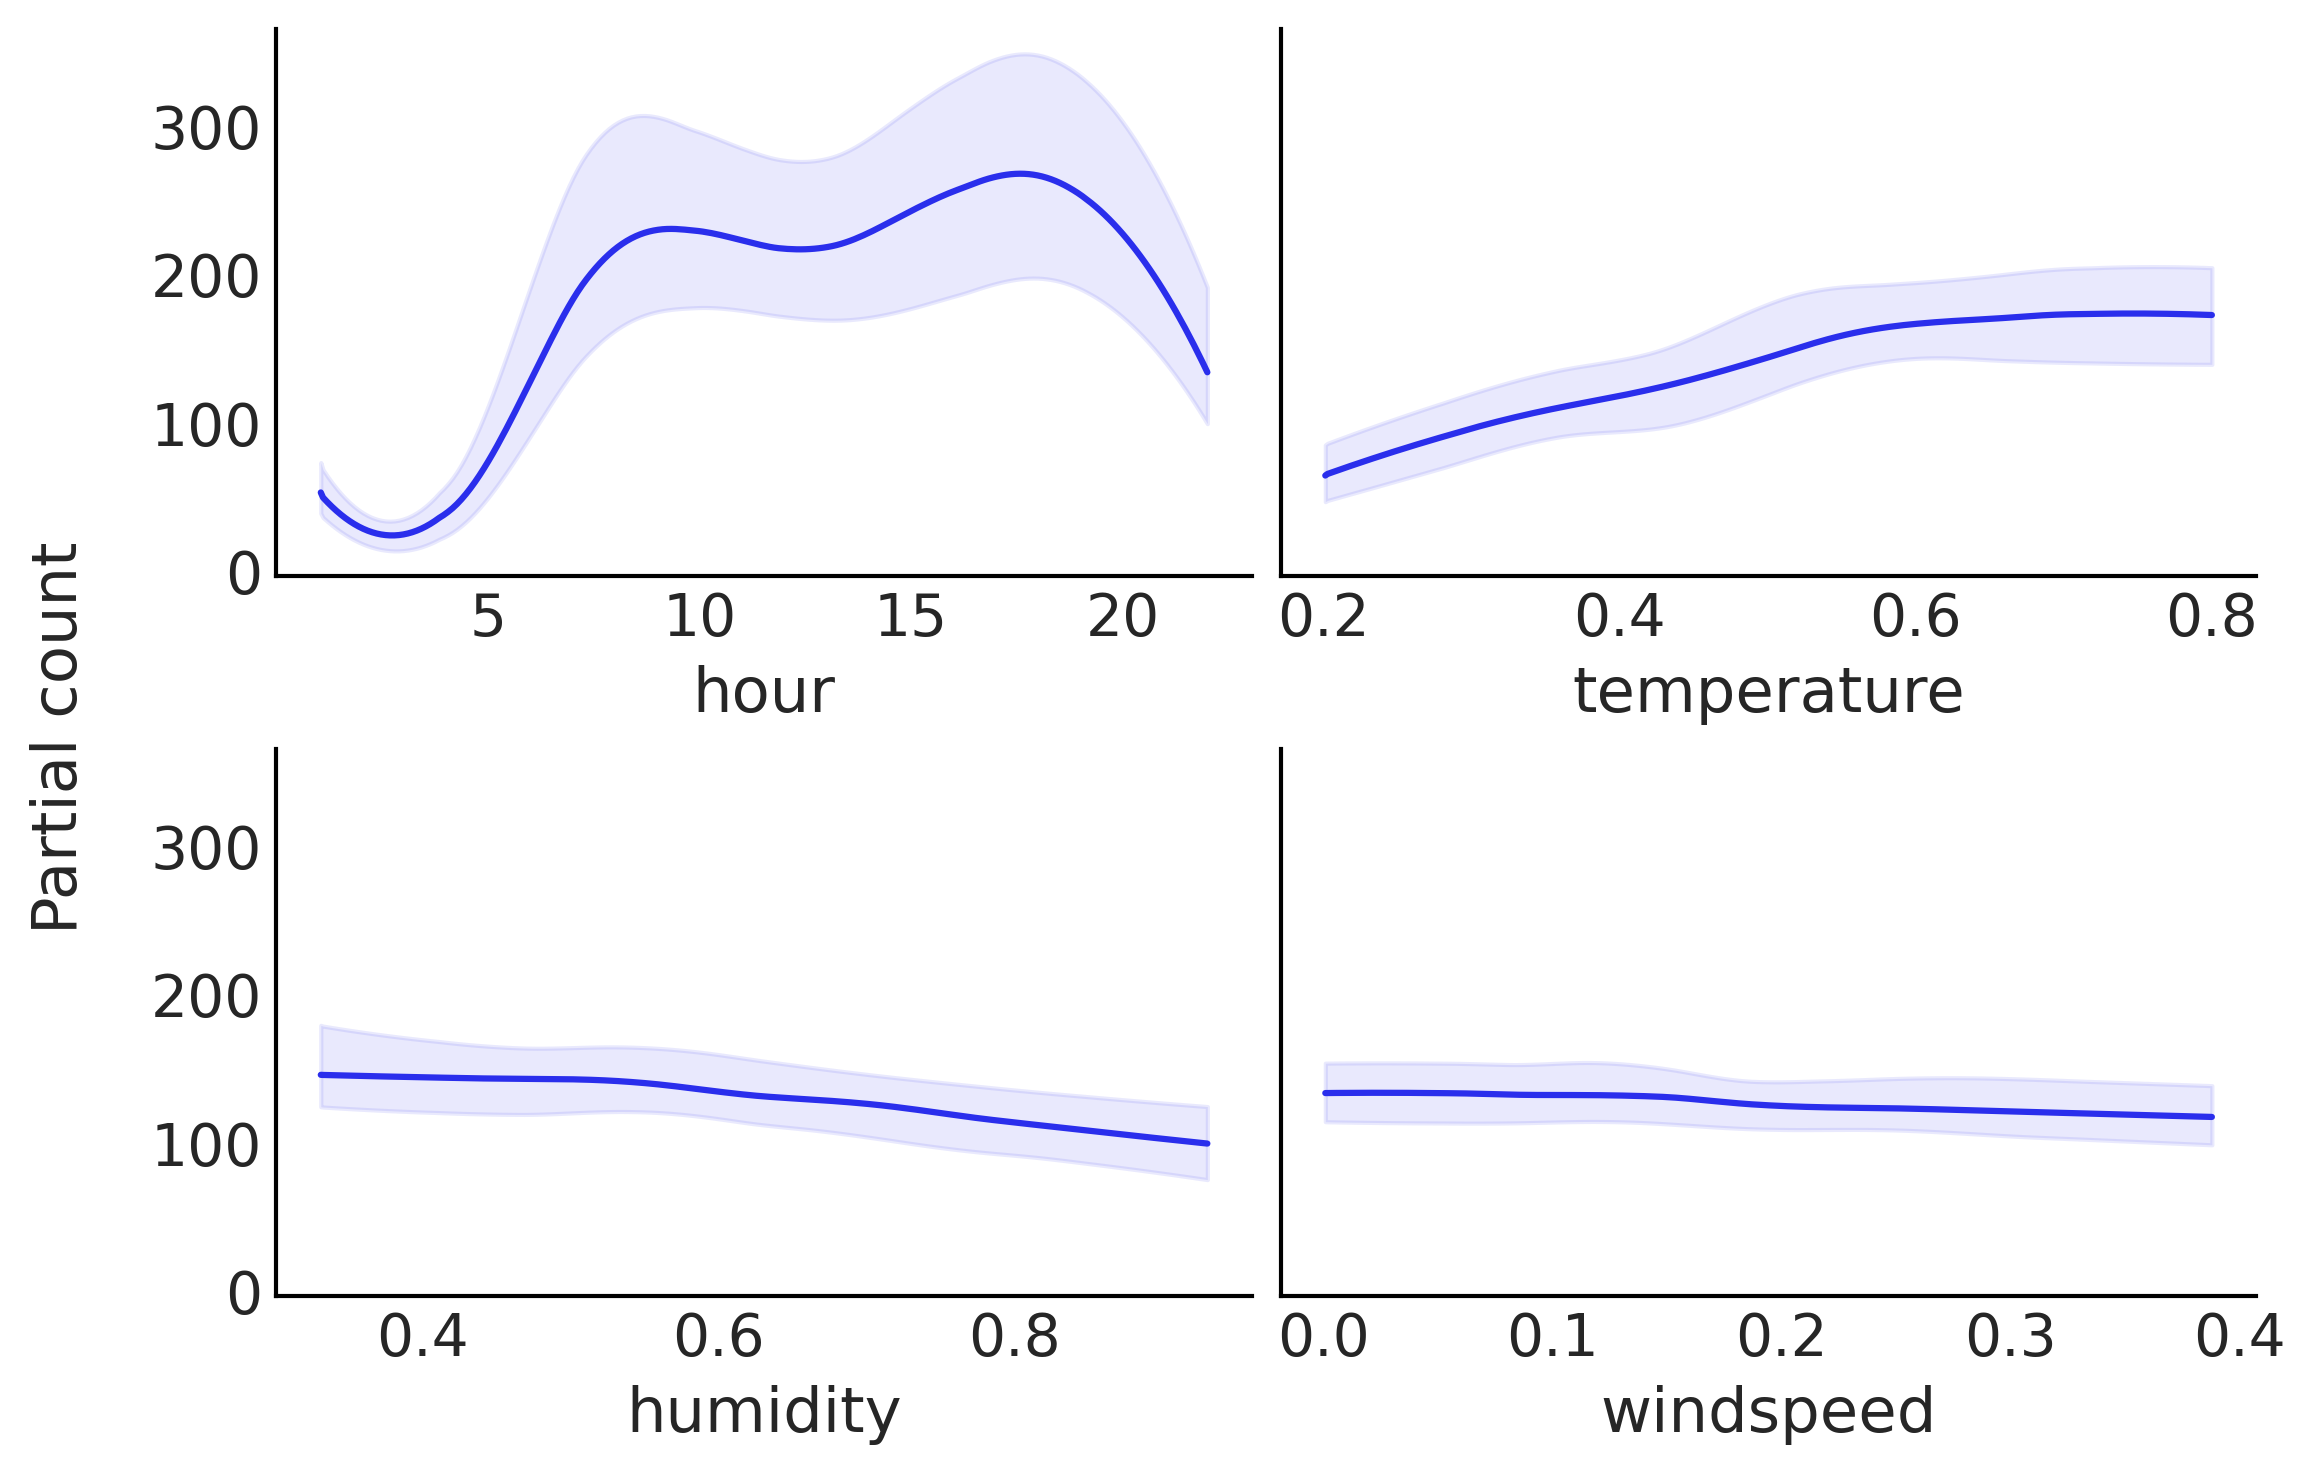

In [5]:
pmb.plot_pdp(μ_, X=X, Y=Y, grid=(2, 2), func=np.exp);

In [6]:
az.summary(idata_bikes, var_names=["α"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,2.211,0.223,1.788,2.631,0.027,0.019,68.0,1357.0,1.05


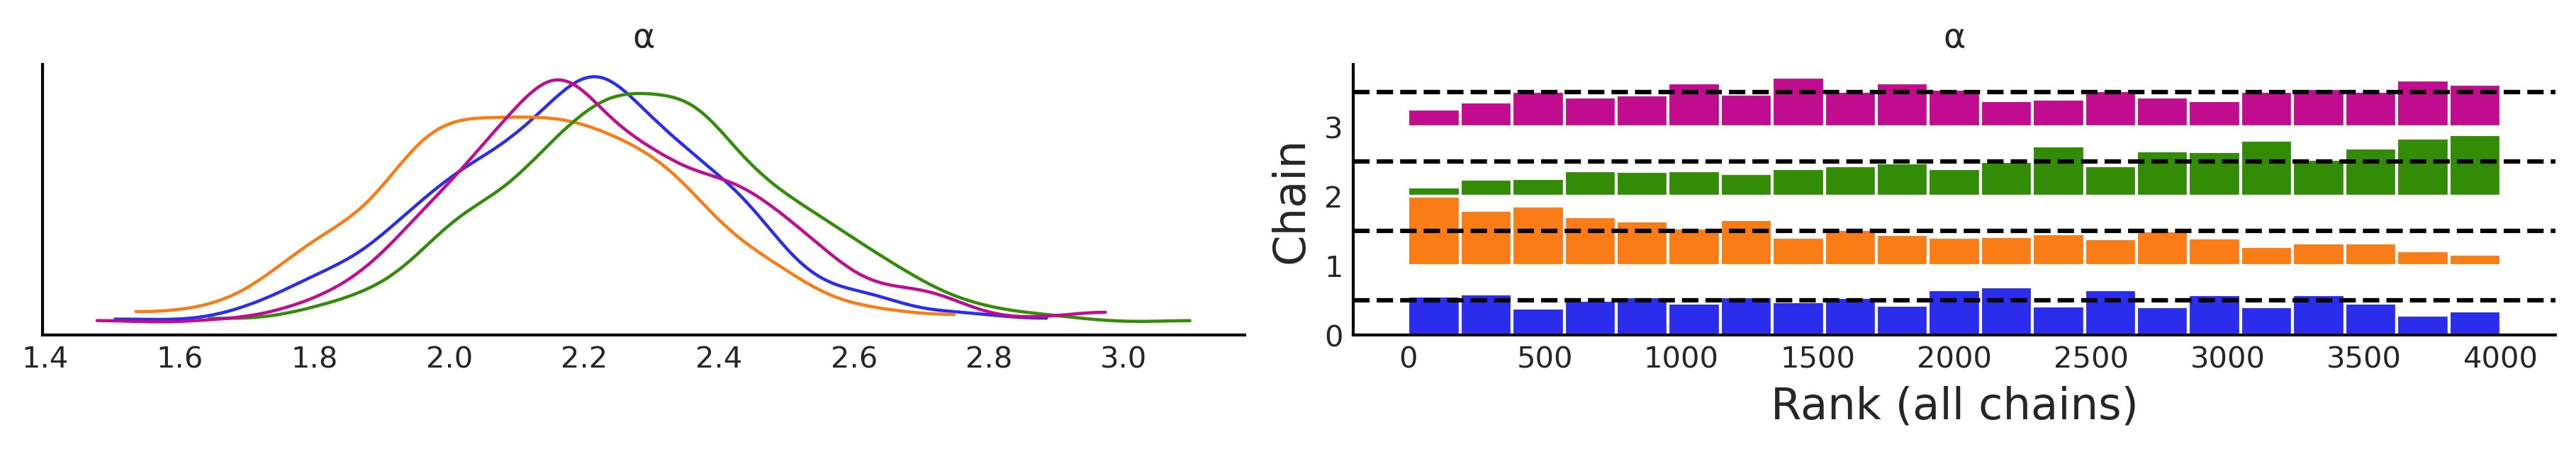

In [7]:
az.plot_trace(idata_bikes, compact=False, var_names=["α"], kind="rank_bars");

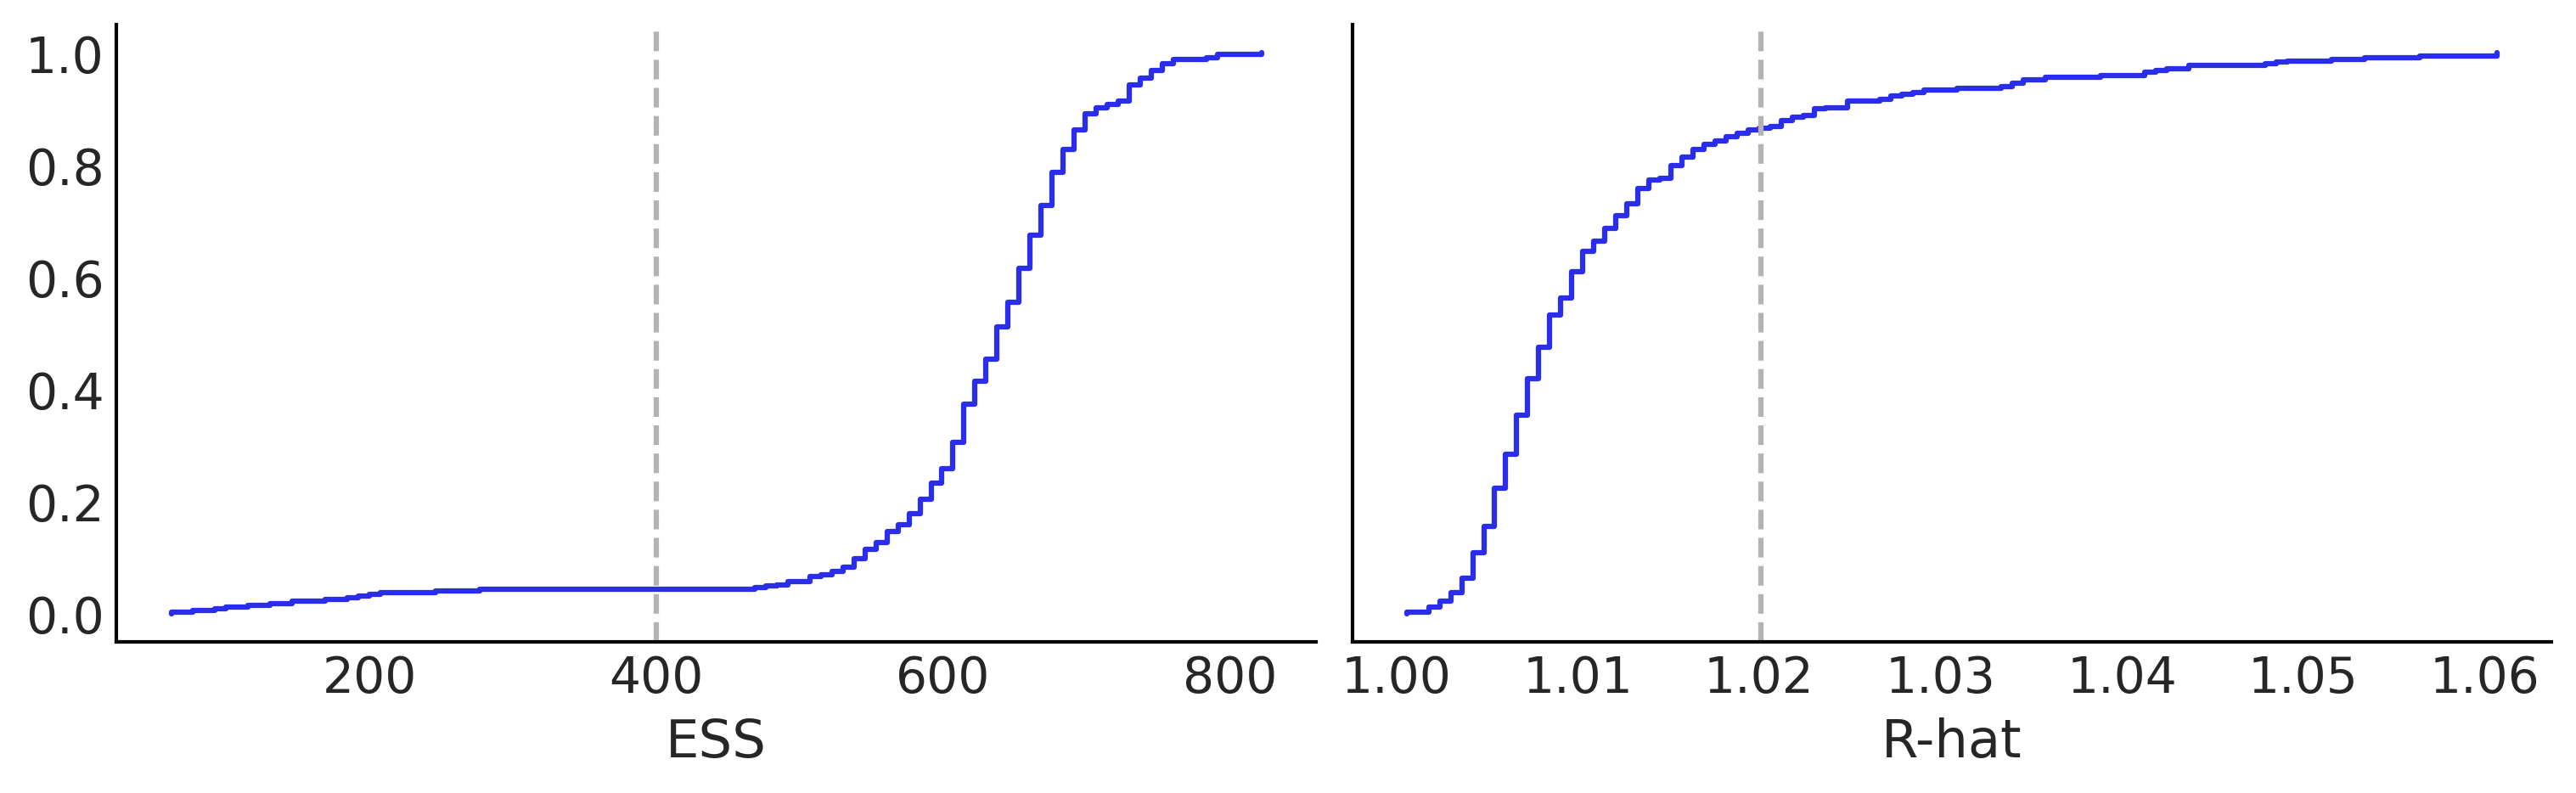

In [8]:
pmb.plot_convergence(idata_bikes, var_name="μ");

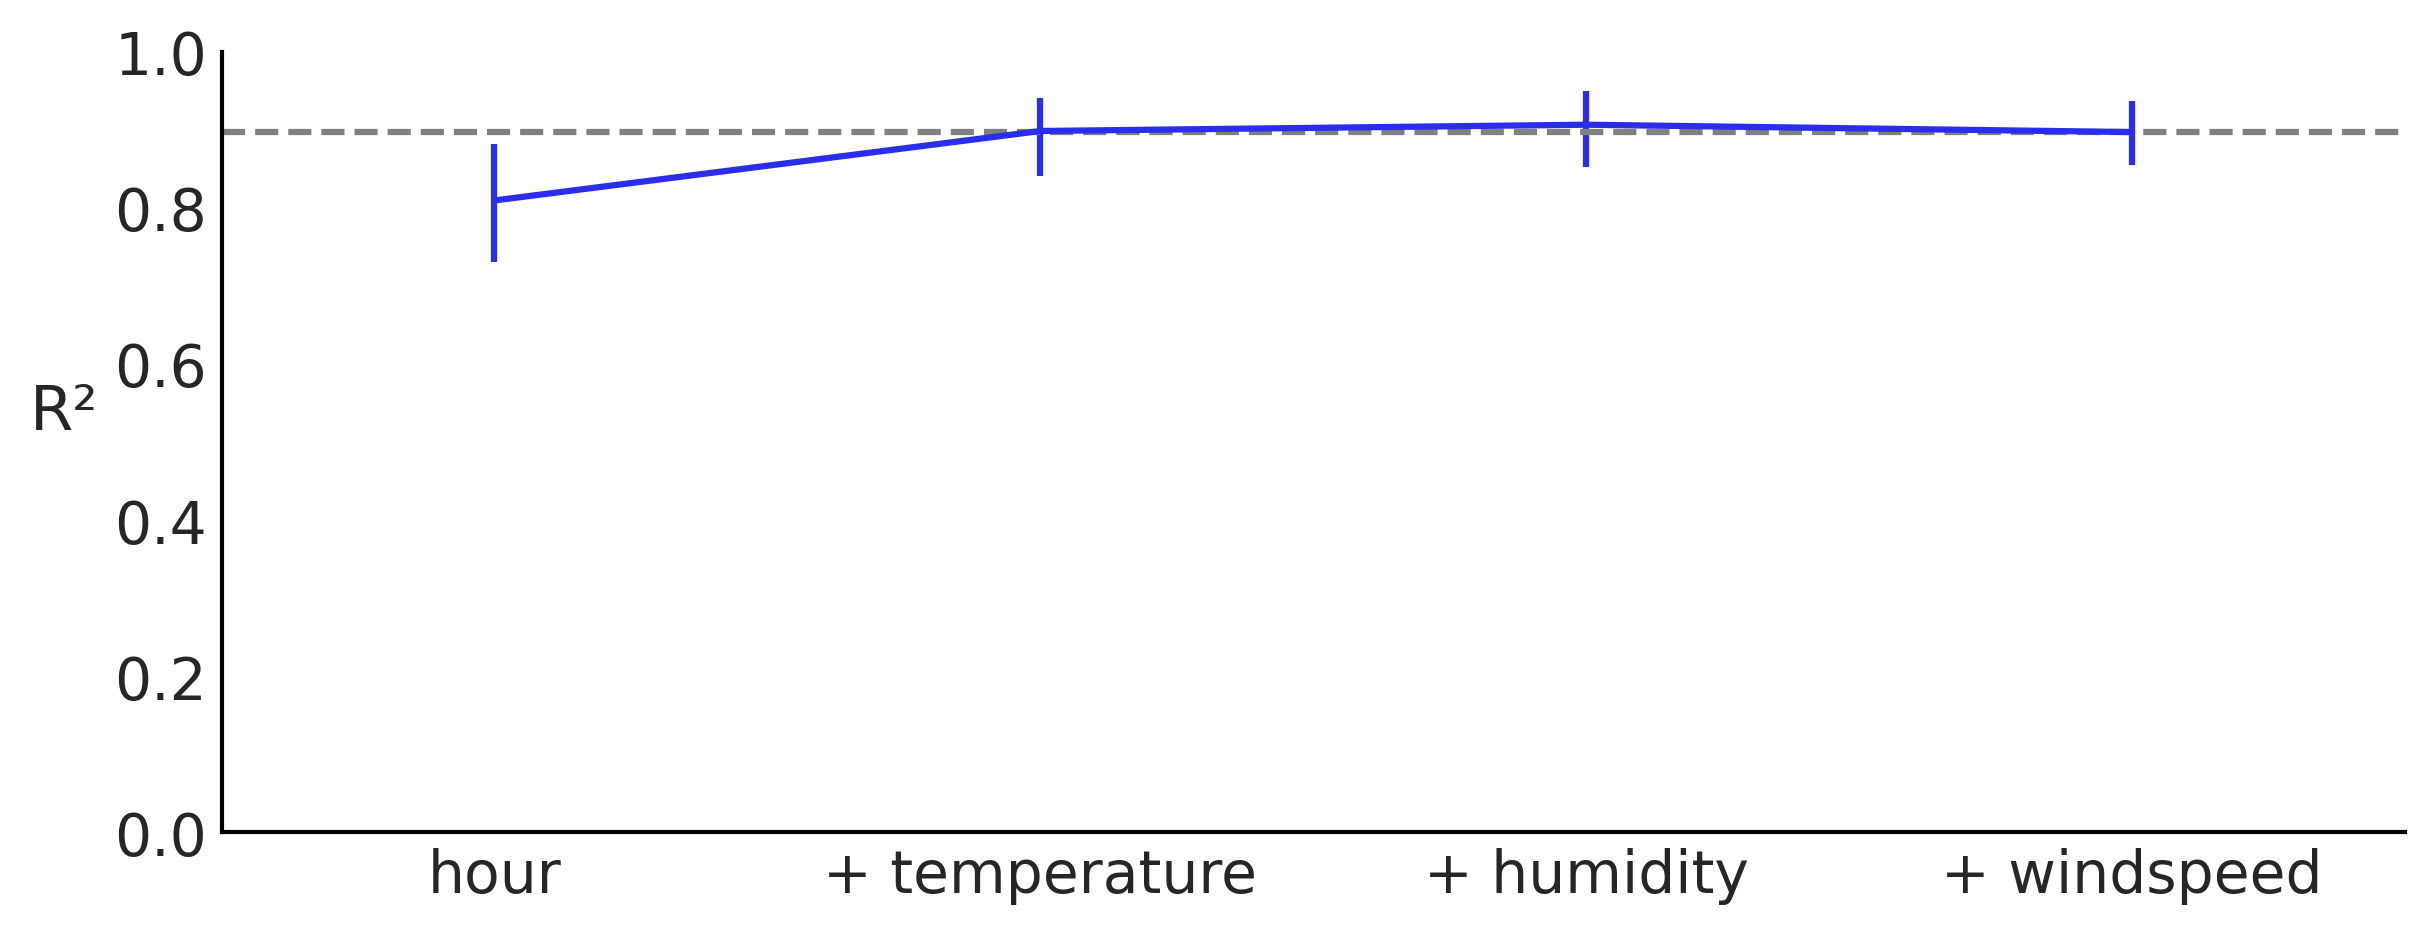

In [9]:
pmb.utils.plot_variable_importance(idata_bikes, μ_, X, samples=100);

## Time with less variables  

### Three variables

In [10]:
X3 = bikes[["hour", "temperature", "humidity"]]

In [11]:
with pm.Model() as model_bikes_3V:
    α = pm.Exponential("α", 0.1)
    μ_ = pmb.BART("μ_", X3, np.log(Y), m=50)
    μ = pm.Deterministic("μ", np.exp(μ_))
    y = pm.NegativeBinomial("y", mu=μ, alpha=α, observed=Y)

    idata_bikes_3V = pm.sample(
        chains=4, random_seed=RANDOM_SEED, compute_convergence_checks=False
    )

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 92 seconds.


In [12]:
az.summary(idata_bikes_3V, var_names=["α"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,2.164,0.208,1.768,2.534,0.006,0.004,1060.0,1983.0,1.01


### Two variables

In [13]:
X2 = bikes[["hour", "temperature"]]

In [14]:
with pm.Model() as model_bikes_2V:
    α = pm.Exponential("α", 0.1)
    μ_ = pmb.BART("μ_", X2, np.log(Y), m=50)
    μ = pm.Deterministic("μ", np.exp(μ_))
    y = pm.NegativeBinomial("y", mu=μ, alpha=α, observed=Y)

    idata_bikes_2V = pm.sample(
        chains=4, random_seed=RANDOM_SEED, compute_convergence_checks=False
    )

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 92 seconds.


In [15]:
az.summary(idata_bikes_2V, var_names=["α"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,2.213,0.202,1.846,2.609,0.006,0.004,1055.0,1840.0,1.01


### One variable  

In [16]:
X1 = bikes[["hour"]]

In [17]:
with pm.Model() as model_bikes_1V:
    α = pm.Exponential("α", 0.1)
    μ_ = pmb.BART("μ_", X1, np.log(Y), m=50)
    μ = pm.Deterministic("μ", np.exp(μ_))
    y = pm.NegativeBinomial("y", mu=μ, alpha=α, observed=Y)

    idata_bikes_1V = pm.sample(
        chains=4, random_seed=RANDOM_SEED, compute_convergence_checks=False
    )

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 93 seconds.


In [18]:
az.summary(idata_bikes_1V, var_names=["α"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,1.87,0.149,1.579,2.139,0.004,0.003,1515.0,2274.0,1.0
